local


<Axes: >

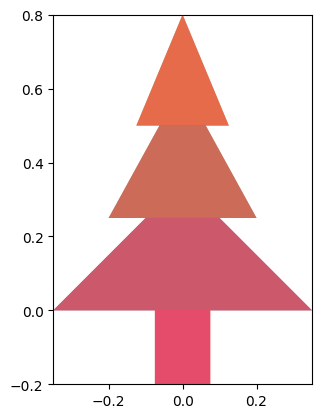

In [63]:
import sys
sys.path.append('/mnt/d/packing/code/core/')
import kaggle_support as kgs
import importlib
importlib.reload(kgs)
pack_vis.plot_polygons([kgs.center_tree] + kgs.convex_breakdown)

(0.0009318265924323091,
 array([[ 0.03740508,  0.02995635, -0.01440208],
        [-0.03740508, -0.02995635, -0.023003  ],
        [ 0.        ,  0.        ,  0.        ]]))

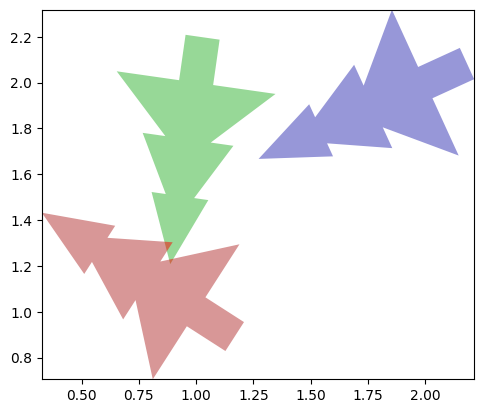

In [53]:
import pack_basics
import pack_vis
importlib.reload(pack_basics)
importlib.reload(pack_vis)
tree_list = pack_basics.place_random(10, 2)
tree_list.xyt = [[1.,1.,1.],[1.,2,3.],[2.,2.,2.]]
pack_vis.visualize_tree_list(tree_list)
import pack_cost
importlib.reload(pack_cost)
cost = pack_cost.PackingCost()
cost.collision_cost = pack_cost.CollisionCostOverlappingArea()
total_cost, total_grad = cost.compute_total_cost_ref(tree_list.xyt, include_gradients=True)
total_cost, total_grad

<Axes: >

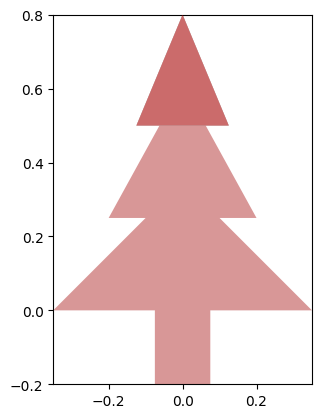

In [34]:
trees=tree_list.get_trees()

In [35]:
t=trees[0]
t?

Type:        Polygon
String form: POLYGON ((0.3268232121536827 1.4322418446945118, 0.6468022958295692 1.375335026035057, 0.61303340 <...> .2175592163835764, 0.5117267193625343 1.1649672798330828, 0.3268232121536827 1.4322418446945118))
File:        ~/miniconda3/envs/xlab/lib/python3.11/site-packages/shapely/geometry/polygon.py
Docstring:  
A geometry type representing an area that is enclosed by a linear ring.

A polygon is a two-dimensional feature and has a non-zero area. It may
have one or more negative-space "holes" which are also bounded by linear
rings. If any rings cross each other, the feature is invalid and
operations on it may fail.

Parameters
----------
shell : sequence
    A sequence of (x, y [,z]) numeric coordinate pairs or triples, or
    an array-like with shape (N, 2) or (N, 3).
    Also can be a sequence of Point objects.
holes : sequence
    A sequence of objects which satisfy the same requirements as the
    shell parameters above

Attributes
----------
exterior : 

TypeError: 'GeometryCollection' object is not iterable

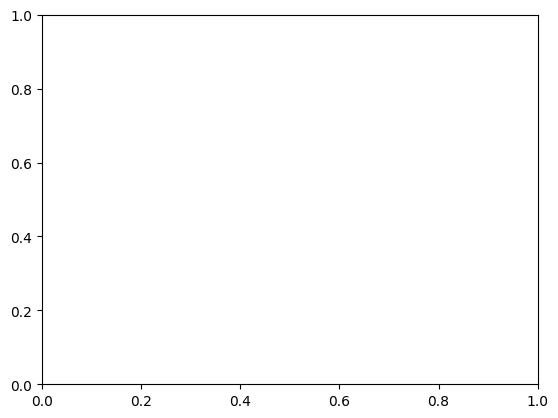

In [ ]:
import shapely
tr=shapely.constrained_delaunay_triangles(kgs.center_tree)
pack_vis.plot_polygons(tr)
import matplotlib.pyplot as plt
plt.figure()
pack_vis.plot_polygons([kgs.center_tree])

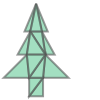

In [49]:
tr